# Imports and installs

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00


In [ ]:
import requests
import re
import math
from collections import defaultdict, deque, Counter
from scipy.stats import entropy
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset
from scipy.spatial import distance

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data preparation

In [ ]:
def get_tokens(name, words=False):
  """this function gets .txt from url, cleans it and return a list of characters (letters with spaces by default, or words - if specified)"""
  path = f"https://wolnelektury.pl/media/book/txt/{name}.txt"
  data = requests.get(path).text
  data = re.sub("[\r\n«»(){}_]"," ", data) # remove newline + characters not removed later
  data = re.sub(r"[\[\]]"," ", data)
  data = data.split('Ta lektura, podobnie jak tysiące innych,', 1)[0] # remove the footnote about Wolne Lektury
  data = re.sub(r'[^a-żA-Ż ]+', '', data) # remove all characters except from letters and spaces
  data = data.lower() # convert to lowercase
  data = ' '.join(data.split()) # turn multiple spaces into one

  if words:
    return data.split()
  else:
    return [*data]


def combine(data, category, words=False):
  """combining the works in the same genre into one list of letters(/words)"""
  full_data = []
  for name in data[category]:
    full_data.append(get_tokens(name, words))
  return list(chain(*full_data))


def calc_entropy(data_list):
  return entropy([x[1]/Counter(data_list).total()  for x in Counter(data_list).most_common()], base=2)

In [ ]:
mickiewicz = {"liryka": ["sonety-odeskie-blogoslawienstwo-z-petrarki", "czaty", "mickiewicz-do-d-d",
                         "sonety-odeskie-do-d-d-elegia", "mickiewicz-do-joachima-lelewela", "sonety-odeskie-do-m",
                         "sonety-odeskie-do-marii-p", "mickiewicz-do-maryi-lempickiej", "mickiewicz-do-maryi-szymanowskiej",
                         "mickiewicz-do-matki-polki", "mickiewicz-do-mojego-cicerone", "mickiewicz-do-na-alpach-w-splugen-1829",
                         "farys", "mickiewicz-kochanek-duchow",
                         "liryki-lozanskie-ach-juz-i-w-rodzicielskim-domu", "liryki-lozanskie-bron-mnie-przed-soba",
                         "liryki-lozanskie-do-b-z", "liryki-lozanskie-gdy-tu-moj-trup", "liryki-lozanskie-nad-woda-wielka-i-czysta",
                         "liryki-lozanskie-polaly-sie-lzy", "liryki-lozanskie-pytasz-za-co-bog", "liryki-lozanskie-rece-za-lud-walczace",
                         "liryki-lozanskie-snila-sie-zima", "liryki-lozanskie-snuc-milosc", "liryki-lozanskie-uciec-z-dusza-na-listek",
                         "liryki-lozanskie-widzenie", "liryki-lozanskie-zal-rozrzutnika", "sonety-odeskie-niepewnosc",
                         "oda-do-mlodosci", "panicz-i-dziewczyna", "piesn-filaretow", "popas-w-upicie", "reduta-ordona",
                         "renegat", "smierc-pulkownika", "mickiewicz-sen",
                         "sonety-krymskie-stepy-akermanskie", "sonety-krymskie-cisza-morska", "sonety-krymskie-zegluga",
                         "sonety-krymskie-burza", "sonety-krymskie-widok-gor-ze-stepow-kozlowa", "sonety-krymskie-bakczysaraj",
                         "sonety-krymskie-bakczysaraj-w-nocy", "sonety-krymskie-grob-potockiej", "sonety-krymskie-mogily-haremu",
                         "sonety-krymskie-bajdary", "sonety-krymskie-aluszta-w-dzien", "sonety-krymskie-aluszta-w-nocy",
                         "sonety-krymskie-czatyrdah", "sonety-krymskie-pielgrzym", "sonety-krymskie-droga-nad-przepascia-w-czufut-kale",
                         "sonety-krymskie-gora-kikineis", "sonety-krymskie-ruiny-zamku-w-balaklawie", "sonety-krymskie-ajudah",
                         "sonety-odeskie-przypomnienie", "sonety-odeskie-do-laury", "sonety-odeskie-mowie-z-soba",
                         "sonety-odeskie-nieuczona-twa-postac", "sonety-odeskie-widzenie-sie-w-gaju", "sonety-odeskie-potepi-nas-swietoszek",
                         "sonety-odeskie-ranek-i-wieczor", "sonety-odeskie-do-niemna", "sonety-odeskie-strzelec",
                         "sonety-odeskie-rezygnacja", "sonety-odeskie-do-patrzysz-mi-w-oczy", "sonety-odeskie-xii",
                         "sonety-odeskie-pierwszy-raz-jam-niewolnik", "sonety-odeskie-luba-ja-wzdycham", "sonety-odeskie-dzien-dobry",
                         "sonety-odeskie-dobranoc", "sonety-odeskie-dobry-wieczor", "sonety-odeskie-do-d-d-wizyta",
                         "sonety-odeskie-do-wizytujacych", "sonety-odeskie-pozegnanie-do-d-d", "sonety-odeskie-danaidy",
                         "sonety-odeskie-ekskuza", "trzech-budrysow", "ucieczka", "sonety-odeskie-w-imionniku-c-s",
                         "sonety-odeskie-zeglarz", "mickiewicz-zaloty", "sonety-odeskie-zima-miejska", "sonety-odeskie-z-petrarki"],

              "epika": ["mickiewicz-bajki-chlop-i-zmija", "grazyna", "konrad-wallenrod",
                        "mickiewicz-bajki-koza-kozka-i-wilk", "ksiegi-narodu-polskiego-i-pielgrzymstwa-polskiego",
                        "pan-tadeusz", "mickiewicz-zywila"],

              "dramat": ["dziady-dziady-poema-upior", "dziady-dziady-poema-dziady-czesc-ii",
                         "dziady-dziady-poema-dziady-czesc-iv", "dziady-dziady-poema-dziady-czesc-iii",
                         "dziady-dziady-widowisko-czesc-i", "dziady-dziadow-czesci-iii-ustep-droga-do-rosji",
                         "dziady-dziadow-czesci-iii-ustep-przedmiescia-stolicy", "dziady-dziadow-czesci-iii-ustep-petersburg",
                         "dziady-dziadow-czesci-iii-ustep-pomnik-piotra-wielkiego", "dziady-dziadow-czesci-iii-ustep-przeglad-wojska",
                         "dziady-dziadow-czesci-iii-ustep-oleszkiewicz", "dziady-dziadow-czesci-iii-ustep-do-przyjaciol-moskali"],

              "synkretyczne": ["mickiewicz-ballady-i-romanse-pierwiosnek", "ballady-i-romanse-romantycznosc",
                               "ballady-i-romanse-switez", "ballady-i-romanse-switezianka", "ballady-i-romanse-rybka",
                               "ballady-i-romanse-powrot-taty", "mickiewicz-ballady-i-romanse-kurhanek-maryli",
                               "mickiewicz-ballady-i-romanse-do-przyjaciol", "mickiewicz-ballady-i-romanse-to-lubie",
                               "ballady-i-romanse-rekawiczka", "ballady-i-romanse-pani-twardowska", "mickiewicz-tukaj",
                               "ballady-i-romanse-lilje", "mickiewicz-dudarz"]}

In [ ]:
for k in list(mickiewicz.keys()):
  print(k, f": {len(mickiewicz[k])} items")

liryka : 83 items
epika : 7 items
dramat : 12 items
synkretyczne : 14 items


In [ ]:
słowacki = {"liryka": ["a-jednak-ja-nie-watpie-bo-sie-pora-zbliza", "slowacki-anhelli", "aniol-ognisty-moj-aniol-lewy",
                       "anioly-stoja-na-rodzinnych-polach", "baranki-moje", "beniowski-piec-pierwszych-piesni",
                       "beniowski-dalsze-piesni", "bo-mie-matka-moja-mila", "bo-to-jest-wieszcza-najjasniejsza-chwala",
                       "chor-duchow-izraelskich", "corka-cerery", "dajcie-mi-tylko-jedne-ziemi-mile",
                       "do-franciszka-szemiotha", "do-hr-gustawa-olizara-podziekowanie-za-wystrzyzynke-z-gwiazdeczka-i-krzemiencem",
                       "do-ludwiki-bobrowny", "do-matki-w-ciemnosciach-postac-mi-stoi-matczyna", "do-matki",
                       "do-pani-joanny-bobrowej", "do-pastereczki-siedzacej-na-druidow-kamieniach-w-pornic-nad-oceanem",
                       "do-teofila-januszewskiego", "do-zygmunta", "duma-o-waclawie-rzewuskim",
                       "dusza-sie-moja-zamysla-gleboko", "gdy-noc-gleboka-wszystko-uspi-i-oniemi", "godzina-mysli",
                       "grob-agamemnona", "slowacki-hugo", "hymn-bogarodzico-dziewico",
                       "hymn-o-zachodzie-slonca-na-morzu", "i-wstal-anhelli-z-grobu-za-nim-wszystkie-duchy", "jan-bielecki",
                       "jezeli-ci-pan-nie-zbuduje-domu", "kiedy-prawdziwie-polacy-powstana", "krol-duch", "kulik",
                       "lambro", "los-mie-juz-zaden-nie-moze-zatrwozyc", "mnich", "moj-adamito-widzisz-jak-to-trudne",
                       "na-drzewie-zawisl-waz", "narodzie-moj", "na-sprowadzenie-prochow-napoleona",
                       "niedawno-jeszcze-kiedym-spoczywal-uspiony", "niedawno-jeszcze-wasze-mogily",
                       "oda-do-wolnosci", "odpowiedz-na-psalmy-przyszlosci-ujecie-wczesniejsze", "o-nieszczesliwa-o-uciemiezona",
                       "o-polsko-moja-tys-pierwsza-swiatu", "ostatnie-wspomnienie-do-laury", "oto-bog-ktory-lona-tajemnic-odmyka",
                       "paryz", "poeta-i-natchnienie", "pogrzeb-kapitana-meyznera", "proroctwo",
                       "prowadzil-mnie-na-bardzo-ciemne-wezowisko", "przeklestwo-do", "rozlaczenie", "rozmowa-z-piramidami",
                       "rzym", "smierc-co-trzynascie-lat-stala-kolo-mnie", "sni-mi-sie-jakas-wielka-a-przez-wieki-idaca",
                       "snycerz-byl-zatrudniony-dyjany-lepieniem", "sowinski-w-okopach-woli", "tak-mi-boze-dopomoz",
                       "ten-sam-duchowi-plomienny-szlak", "testament-moj", "trzy-poemata-ojciec-zadzumionych",
                       "ty-glos-cierpiacy-podnies-i-niech-w-tobie", "w-albumie-e-hr-krasinskiej", "w-dziecinne-moje-cudne-lata",
                       "wielcysmy-byli-i-smiesznismy-byli", "wierze", "wiesz-panie-izem-zbiegal-swiat-szeroki",
                       "w-ostatni-dzien-w-ostatni-dzien", "w-pamietniku-zofii-bobrowny", "wspomnienie-pani-de-st-marcel-z-domu-chauveaux",
                       "w-sztambuchu-marii-wodzinskiej", "wyjdzie-stu-robotnikow", "zmija", "zachwycenie", "z-listu-do-ksiegarza"],

            "epika": ["slowacki-do-emigracji-o-potrzebie-idei", "slowacki-pisma-mistyczne",
                      "slowacki-podroz-na-wschod"],

            "dramat": ["balladyna", "slowacki-fantazy", "kordian", "slowacki-ksiadz-marek",
                       "slowacki-ksiaze-niezlomny", "slowacki-lilla-weneda", "slowacki-maria-stuart",
                       "slowacki-mazepa", "slowacki-mindowe", "slowacki-sen-srebrny-salomei"]}

In [ ]:
for k in list(słowacki.keys()):
  print(k, f": {len(słowacki[k])} items")

liryka : 81 items
epika : 3 items
dramat : 10 items


# Mickiewicz

## Entropy calculated on letters

In [ ]:
m_liryka = combine(mickiewicz, "liryka")
m_epika = combine(mickiewicz, "epika")
m_dramat = combine(mickiewicz, "dramat")
m_synkretyczne = combine(mickiewicz, "synkretyczne")

In [ ]:
print("entropy for m_liryka: ", calc_entropy(m_liryka))
print("entropy for m_epika: ", calc_entropy(m_epika))
print("entropy for m_dramat: ", calc_entropy(m_dramat))
print("entropy for m_synkretyczne: ", calc_entropy(m_synkretyczne))

entropy for m_liryka:  4.483751500072691
entropy for m_epika:  4.482349867684975
entropy for m_dramat:  4.475958074000096
entropy for m_synkretyczne:  4.456548496483136


In [ ]:
m_total = m_liryka + m_epika + m_dramat + m_synkretyczne
print("entropy for m_total: ", calc_entropy(m_total))

entropy for m_total:  4.4805736277525225


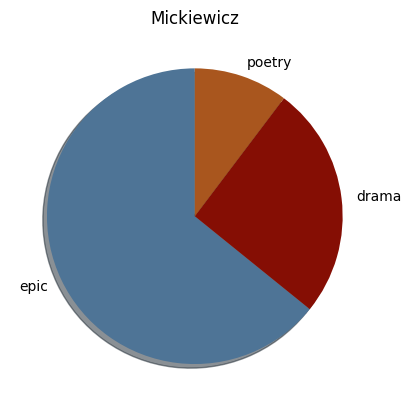

In [ ]:
my_labels = ["epic", "drama", "poetry"]
colors = ['xkcd:cadet blue','xkcd:indian red','xkcd:sienna']
fig = plt.figure()
plt.pie(np.array([len(m_epika), len(m_dramat), len(m_liryka)]),
        labels = my_labels, startangle = 90, colors=colors, shadow=True)
plt.title("Mickiewicz")
plt.show()
fig.savefig('mick.png', transparent=True)

## Entropy calculated on words

In [ ]:
wo_m_liryka = combine(mickiewicz, "liryka", words=True)
wo_m_epika = combine(mickiewicz, "epika", words=True)
wo_m_dramat = combine(mickiewicz, "dramat", words=True)
wo_m_synkretyczne = combine(mickiewicz, "synkretyczne", words=True)

In [ ]:
print("entropy for wo_m_liryka", calc_entropy(wo_m_liryka))
print("entropy for wo_m_epika: ", calc_entropy(wo_m_epika))
print("entropy for wo_m_dramat: ", calc_entropy(wo_m_dramat))
print("entropy for wo_m_synkretyczne: ", calc_entropy(wo_m_synkretyczne))

entropy for wo_m_liryka 11.156502273596512
entropy for wo_m_epika:  11.906920092855025
entropy for wo_m_dramat:  11.393040248193122
entropy for wo_m_synkretyczne:  10.574353299513861


In [ ]:
wo_m_total = wo_m_liryka + wo_m_epika + wo_m_dramat + wo_m_synkretyczne
print("entropy for wo_m_total: ", calc_entropy(wo_m_total))

entropy for wo_m_total:  12.101215378058402


# Słowacki

## Entropy calculated on letters

In [ ]:
s_liryka = combine(słowacki, "liryka")
s_epika = combine(słowacki, "epika")
s_dramat = combine(słowacki, "dramat")

In [ ]:
print("entropy for s_liryka: ", calc_entropy(s_liryka))
print("entropy for s_epika: ", calc_entropy(s_epika))
print("entropy for s_dramat: ", calc_entropy(s_dramat))

entropy for s_liryka:  4.474856873529369
entropy for s_epika:  4.495139691130123
entropy for s_dramat:  4.467665675939913


In [ ]:
s_total = s_liryka + s_epika + s_dramat
print("entropy for s_total: ", calc_entropy(s_total))

entropy for s_total:  4.479284549683763


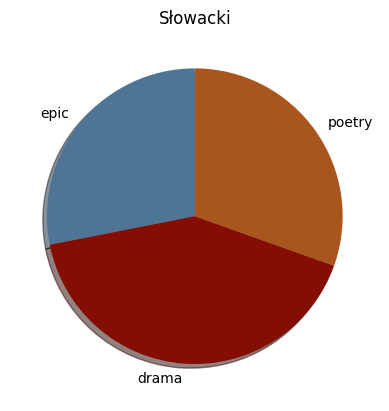

In [ ]:
my_labels = ["epic", "drama", "poetry"]
colors = ['xkcd:cadet blue','xkcd:indian red','xkcd:sienna']
fig = plt.figure()
plt.pie(np.array([len(s_epika), len(s_dramat), len(s_liryka)]),
        labels = my_labels, startangle = 90, colors=colors, shadow=True)
plt.title("Słowacki")
plt.show()
fig.savefig('slow.png', transparent=True)

## Entropy calculated on words

In [ ]:
wo_s_liryka = combine(słowacki, "liryka", words=True)
wo_s_epika = combine(słowacki, "epika", words=True)
wo_s_dramat = combine(słowacki, "dramat", words=True)

In [ ]:
print("entropy for wo_s_liryka", calc_entropy(wo_s_liryka))
print("entropy for wo_s_epika: ", calc_entropy(wo_s_epika))
print("entropy for wo_s_dramat: ", calc_entropy(wo_s_dramat))

entropy for wo_s_liryka 11.7293444956284
entropy for wo_s_epika:  11.70647417520976
entropy for wo_s_dramat:  11.659981040224778


In [ ]:
wo_s_total = wo_s_liryka + wo_s_epika + wo_s_dramat
print("entropy for wo_s_total: ", calc_entropy(wo_s_total))

entropy for wo_s_total:  12.089109946591469


# Information rate approximation

In [ ]:
# (adjusted) estimation functions from:
# https://pit-claudel.fr/clement/blog/an-experimental-estimation-of-the-entropy-of-english-in-50-lines-of-python-code/

orders = list(range(2, 9))

def entropy(stats, normalization_factor):
	return -sum(proba / normalization_factor * math.log2(proba / normalization_factor) for proba in stats.values())

def entropy_rate(model, stats):
	return sum(stats[prefix] * entropy(model[prefix], stats[prefix]) for prefix in stats) / sum(stats.values())


def get_entropy_rates(tokens):
  rates = []
  for order in orders:
    model_order = order
    model, stats = defaultdict(Counter), Counter()
    circular_buffer = deque(maxlen = model_order)

    for token in tokens:
      prefix = tuple(circular_buffer)
      circular_buffer.append(token)
      if len(prefix) == model_order:
        stats[prefix] += 1
        model[prefix][token] += 1

    print(f"Entropy rate for order {order}:", entropy_rate(model, stats))
    rates.append(entropy_rate(model, stats))
  return rates


def plot_rate(rates, plot_color, plot_title, name):
  plt.figure(figsize=(8,3))
  fig = plt.figure()
  plt.scatter(orders, rates, marker='s', color=plot_color)
  plt.xlabel("Model order")
  plt.ylabel("Entropy rate")
  plt.title(plot_title)
  for a,b in zip(orders, rates):
    plt.annotate(str(round(b,2)), xy=(a-0.25, b+0.2))
  ax = plt.gca()
  ax.set_ylim([0, 4])
  ax.set_xlim([1, 9])
  fig.savefig(f'{name}.png', transparent=True)

## Mickiewicz

In [ ]:
mickiewicz_rate = get_entropy_rates(m_total)

Entropy rate for order 2: 2.9962250945063156
Entropy rate for order 3: 2.475055695743526
Entropy rate for order 4: 2.016024873286814
Entropy rate for order 5: 1.5645672611811199
Entropy rate for order 6: 1.1059506824358578
Entropy rate for order 7: 0.7261464055485871
Entropy rate for order 8: 0.4548086848157365


<Figure size 800x300 with 0 Axes>

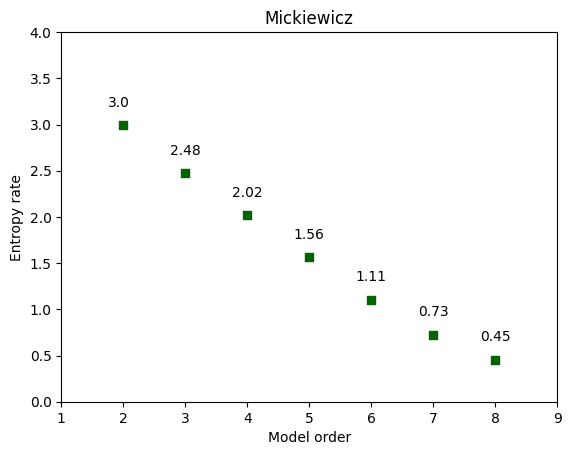

In [ ]:
plot_rate(mickiewicz_rate, "darkgreen", "Mickiewicz", "plot_rate_m")

## Słowacki

In [ ]:
slowacki_rate = get_entropy_rates(s_total)

Entropy rate for order 2: 2.983775194237171
Entropy rate for order 3: 2.4636006662378964
Entropy rate for order 4: 2.0570907264306535
Entropy rate for order 5: 1.7044604555645089
Entropy rate for order 6: 1.3164858687640517
Entropy rate for order 7: 0.9433553668938114
Entropy rate for order 8: 0.6398476724782781


<Figure size 800x300 with 0 Axes>

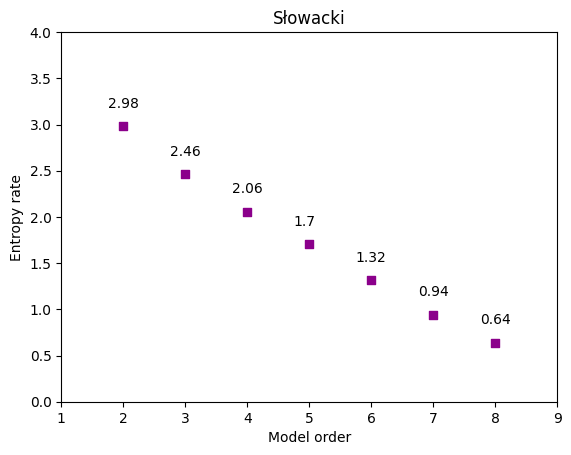

In [ ]:
plot_rate(slowacki_rate, "darkmagenta", "Słowacki", "plot_rate_s")

## Polish Twitter

In [ ]:
# PREPARE DATA

PATH = '/content/drive/MyDrive/Research Lab/RL_emo/'
tweets = pd.read_csv(PATH + 'data/twitteremo_01_03_users_anonymized.csv')

#print(tweets['repeated'].value_counts())
#print(tweets.loc[(tweets.text == ""), :].empty)
# there are no repeated or empty tweets

# delete user handles, links and multiple spaces (if there are any)
USER_REGEX = r"@([^ ]+)"
URL_REGEX = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
tweets.text = tweets.apply(lambda row: re.sub(USER_REGEX, "", row.text), 1)
tweets.text = tweets.apply(lambda row: re.sub(URL_REGEX, "", row.text), 1)
tweets.text = tweets.apply(lambda row: " ".join(row.text.split()), 1)

# get all tweets in one string and clean them
def clean_df(data):
  res_df = re.sub("[\r\n«»(){}_]"," ", data) # remove newline + characters not removed later
  res_df = re.sub(r"[\[\]]"," ", res_df)
  res_df = re.sub(r'[^a-żA-Ż ]+', '', res_df) # remove all characters except from letters and spaces
  res_df = res_df.lower() # convert to lowercase
  res_df = ' '.join(res_df.split()) # turn multiple spaces into one
  return res_df

tweet_s = " ".join(tweets.text.to_list())
tweet_s = clean_df(tweet_s)

# take only 2M tokens (to match the size of Słowacki dataset)
tweet_tokens = [*tweet_s[:2000000]]

<ipython-input-3-b366a8352958>:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(PATH + 'data/twitteremo_01_03_users_anonymized.csv')


In [ ]:
calc_entropy(tweet_tokens)

4.455571886550087

In [ ]:
tweets_rate = get_entropy_rates(tweet_tokens)

Entropy rate for order 2: 3.0602781790302553
Entropy rate for order 3: 2.5034203599996876
Entropy rate for order 4: 2.008901088903096
Entropy rate for order 5: 1.5808870476998649
Entropy rate for order 6: 1.1822344747925846
Entropy rate for order 7: 0.8439075954497616
Entropy rate for order 8: 0.5823445750716962


<Figure size 800x300 with 0 Axes>

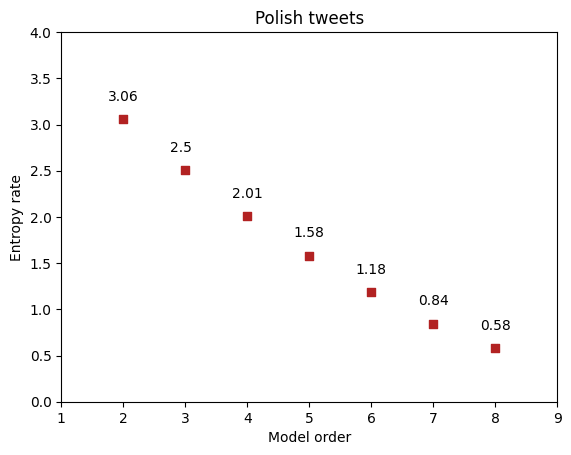

In [ ]:
plot_rate(tweets_rate, "firebrick", "Polish tweets", "plot_rate_t")

### Full dataset

In [ ]:
len([*tweet_s])

4007222

In [ ]:
tweets_rate_full = get_entropy_rates([*tweet_s])

Entropy rate for order 2: 3.0647042733751957
Entropy rate for order 3: 2.5230501011958646
Entropy rate for order 4: 2.0656790203301623
Entropy rate for order 5: 1.6896742725014926
Entropy rate for order 6: 1.3277576113738059
Entropy rate for order 7: 0.9929576112695738
Entropy rate for order 8: 0.7148414621072584


<Figure size 800x300 with 0 Axes>

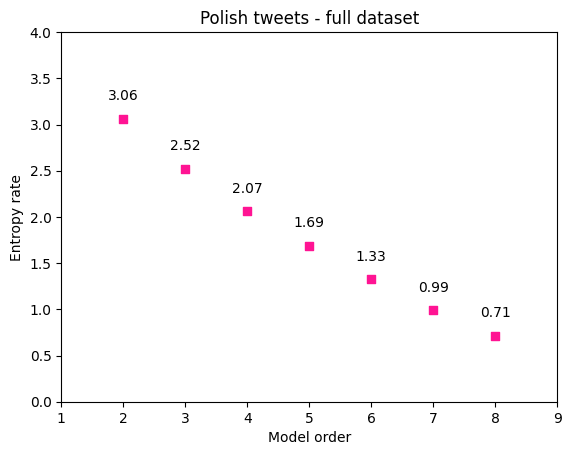

In [ ]:
plot_rate(tweets_rate_full, "deeppink", "Polish tweets - full dataset", "plot_rate_t_full")

## Wikipedia

In [ ]:
dataset = load_dataset("chrisociepa/wikipedia-pl-20230401")

wiki_s = " ".join(dataset["train"]['text'][:1000])
wiki_s = clean_df(wiki_s)

wiki_tokens = [*wiki_s[:2000000]]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1562327 [00:00<?, ? examples/s]

In [ ]:
calc_entropy(wiki_tokens)

4.507209844409659

In [ ]:
wiki_rate = get_entropy_rates(wiki_tokens)

Entropy rate for order 2: 3.118042436599428
Entropy rate for order 3: 2.4658784915084633
Entropy rate for order 4: 1.8775143211078897
Entropy rate for order 5: 1.4041334580735805
Entropy rate for order 6: 1.0247260558481475
Entropy rate for order 7: 0.7408199088601711
Entropy rate for order 8: 0.5364331223972509


<Figure size 800x300 with 0 Axes>

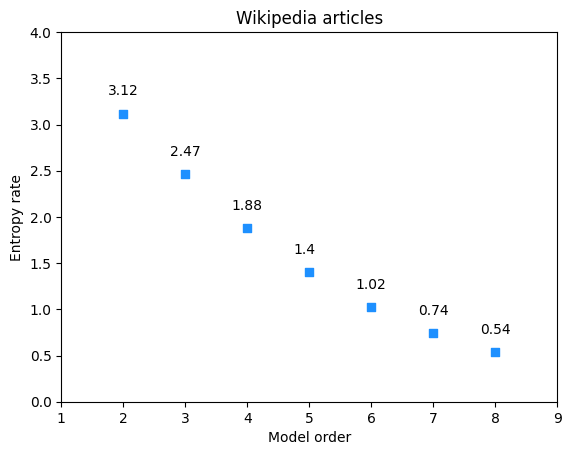

In [ ]:
plot_rate(wiki_rate, "dodgerblue", "Wikipedia articles", "plot_rate_w")

### More data

In [ ]:
dataset = load_dataset("chrisociepa/wikipedia-pl-20230401")

wiki_s = " ".join(dataset["train"]['text'][:48000])
wiki_s = clean_df(wiki_s)

In [ ]:
len([*wiki_s])

95706016

In [ ]:
wiki_rate_full = get_entropy_rates([*wiki_s])
# session brakes at order 8 (too much RAM used)

Entropy rate for order 2: 3.1414374138653005
Entropy rate for order 3: 2.551797343900556
Entropy rate for order 4: 2.0773247367899312
Entropy rate for order 5: 1.759936396766945
Entropy rate for order 6: 1.5077810929615663
Entropy rate for order 7: 1.2725242275535311


<Figure size 800x300 with 0 Axes>

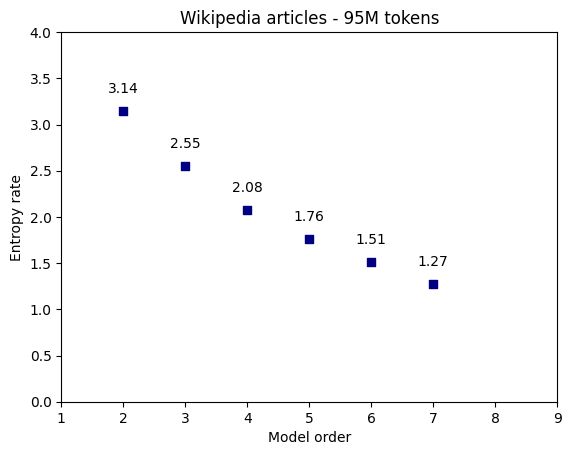

In [ ]:
wiki_rate_full = [3.1414374138653005, 2.551797343900556, 2.0773247367899312, 1.759936396766945, 1.5077810929615663, 1.2725242275535311]
orders = list(range(2, 8))
plot_rate(wiki_rate_full, "navy", "Wikipedia articles - 95M tokens", "plot_rate_w_full")

# Jensen-Shannon distance calculation

In [ ]:
def get_probs(data_list):
  return [x[1]/Counter(data_list).total()  for x in Counter(data_list).most_common()]

def get_distance(lst1, lst2):
  common_letters = list(set(Counter(lst1).keys()) & set(Counter(lst2).keys()))
  return distance.jensenshannon(get_probs([x for x in lst1 if x in common_letters]), get_probs([x for x in lst2 if x in common_letters]))

In [ ]:
def get_common(lst1, lst2):
  common_letters = list(set(Counter(lst1).keys()) & set(Counter(lst2).keys()))
  print(len([x for x in lst1 if x in common_letters]), "/", len(lst1), " --> ", round(len([x for x in lst1 if x in common_letters])/len(lst1)*100, 2))
  print(len([x for x in lst2 if x in common_letters]), "/", len(lst2), " --> ", round(len([x for x in lst2 if x in common_letters])/len(lst2)*100, 2), end="\n\n")

## Character level

### MICKIEWICZ - SŁOWACKI

In [ ]:
get_common(m_total, s_total)
get_common(m_epika, s_epika)
get_common(m_dramat, s_dramat)
get_common(m_liryka, s_liryka)

1043440 / 1043456  -->  100.0
2341083 / 2341098  -->  100.0

633626 / 633628  -->  100.0
657793 / 657813  -->  100.0

251970 / 251998  -->  99.99
970579 / 970580  -->  100.0

101660 / 101661  -->  100.0
712702 / 712705  -->  100.0



In [ ]:
get_distance(m_total, s_total)

0.013668013272910477

In [ ]:
get_distance(m_epika, s_epika)

0.023214548454766875

In [ ]:
get_distance(m_dramat, s_dramat)

0.016083543506318784

In [ ]:
get_distance(m_liryka, s_liryka)

0.020814017610456266

### MICKIEWICZ - TWEETS

In [ ]:
get_common(m_total, tweet_tokens)
get_common(m_total, [*tweet_s])

1042937 / 1043456  -->  99.95
2000000 / 2000000  -->  100.0

1042937 / 1043456  -->  99.95
4007222 / 4007222  -->  100.0



In [ ]:
get_distance(m_total, tweet_tokens)

0.04032544314938982

In [ ]:
get_distance(m_total, [*tweet_s]) # full_dataset

0.040349547911222305

### SŁOWACKI - TWEETS

In [ ]:
get_common(s_total, tweet_tokens)
get_common(s_total, [*tweet_s])

2340759 / 2341098  -->  99.99
2000000 / 2000000  -->  100.0

2340759 / 2341098  -->  99.99
4007222 / 4007222  -->  100.0



In [ ]:
get_distance(s_total, tweet_tokens)

0.039192911762183195

In [ ]:
get_distance(s_total, [*tweet_s]) # full_dataset

0.0392919643096772

### MICKIEWICZ - WIKI

In [ ]:
get_common(m_total, wiki_tokens)

1043456 / 1043456  -->  100.0
1998429 / 2000000  -->  99.92



In [ ]:
get_distance(m_total, wiki_tokens)

0.047662436298620124

### SŁOWACKI - WIKI

In [ ]:
get_common(s_total, wiki_tokens)

2341086 / 2341098  -->  100.0
1998499 / 2000000  -->  99.92



In [ ]:
get_distance(s_total, wiki_tokens)

0.049404838772931024

### TWEETS - WIKI

In [ ]:
get_common(tweet_tokens, wiki_tokens)

2000000 / 2000000  -->  100.0
1998090 / 2000000  -->  99.9



In [ ]:
get_distance(tweet_tokens, wiki_tokens)

0.03074326684994167

## Word level

### MICKIEWICZ - SŁOWACKI

In [ ]:
get_common(wo_m_total, wo_s_total)
get_common(wo_m_epika, wo_s_epika)
get_common(wo_m_dramat, wo_s_dramat)
get_common(wo_m_liryka, wo_s_liryka)

146823 / 170581  -->  86.07
315166 / 384292  -->  82.01

73886 / 102429  -->  72.13
76890 / 102787  -->  74.81

34278 / 42005  -->  81.6
116084 / 162440  -->  71.46

13146 / 16632  -->  79.04
77109 / 119065  -->  64.76



In [ ]:
get_distance(wo_m_total, wo_s_total)

0.06467956551077929

In [ ]:
get_distance(wo_m_epika, wo_s_epika)

0.03892091607344617

In [ ]:
get_distance(wo_m_dramat, wo_s_dramat)

0.1041239682495418

In [ ]:
get_distance(wo_m_liryka, wo_s_liryka)

0.1575430183252121

### MICKIEWICZ - TWEETS

In [ ]:
get_common(wo_m_total, tweet_s.split()[:300000])

124173 / 170581  -->  72.79
195858 / 300000  -->  65.29



In [ ]:
get_distance(wo_m_total, tweet_s.split()[:300000])

0.09355244840924493

### SŁOWACKI - TWEETS

In [ ]:
get_common(wo_s_total, tweet_s.split()[:300000])

283554 / 384292  -->  73.79
208760 / 300000  -->  69.59



In [ ]:
get_distance(wo_s_total, tweet_s.split()[:300000])

0.05851244341830765

### MICKIEWICZ - WIKI

In [ ]:
get_common(wo_m_total, wiki_s.split()[:300000])

114435 / 170581  -->  67.09
152396 / 300000  -->  50.8



In [ ]:
get_distance(wo_m_total, wiki_s.split()[:300000])

0.0746844530481175

### SŁOWACKI - WIKI

In [ ]:
get_common(wo_s_total, wiki_s.split()[:300000])

265119 / 384292  -->  68.99
172795 / 300000  -->  57.6



In [ ]:
get_distance(wo_s_total, wiki_s.split()[:300000])

0.09007729568942628

### TWEETS - WIKI

In [ ]:
get_common(tweet_s.split()[:300000], wiki_s.split()[:300000])

227651 / 300000  -->  75.88
214279 / 300000  -->  71.43



In [ ]:
get_distance(tweet_s.split()[:300000], wiki_s.split()[:300000])

0.11724048400776324

# Additional - most common letters/words

In [ ]:
print(len(Counter(m_total).most_common()))
Counter(m_total).most_common()

46


[(' ', 170465),
 ('i', 78452),
 ('a', 75908),
 ('e', 64428),
 ('o', 58271),
 ('z', 55405),
 ('n', 40895),
 ('s', 38605),
 ('w', 37052),
 ('r', 36995),
 ('c', 36911),
 ('y', 33131),
 ('d', 30447),
 ('k', 30376),
 ('t', 29073),
 ('m', 28198),
 ('ł', 22750),
 ('p', 22430),
 ('u', 19854),
 ('j', 18903),
 ('l', 18063),
 ('b', 15291),
 ('ę', 13811),
 ('g', 12965),
 ('ą', 11407),
 ('h', 10506),
 ('ż', 8663),
 ('ó', 7624),
 ('ś', 7451),
 ('ć', 4667),
 ('ń', 1777),
 ('ź', 1025),
 ('f', 925),
 ('é', 487),
 ('v', 111),
 ('x', 68),
 ('q', 34),
 ('ü', 6),
 ('à', 6),
 ('ô', 4),
 ('è', 4),
 ('ç', 3),
 ('ê', 3),
 ('â', 3),
 ('æ', 2),
 ('ä', 1)]

In [ ]:
print(len(Counter(s_total).most_common()))
Counter(s_total).most_common()

43


[(' ', 384198),
 ('a', 175579),
 ('i', 170288),
 ('e', 149657),
 ('o', 131521),
 ('z', 117878),
 ('n', 97694),
 ('c', 85280),
 ('r', 84770),
 ('w', 81471),
 ('s', 80419),
 ('y', 74121),
 ('t', 69784),
 ('m', 66947),
 ('d', 64822),
 ('k', 62018),
 ('p', 49307),
 ('ł', 47340),
 ('j', 43381),
 ('u', 42313),
 ('l', 40186),
 ('b', 34704),
 ('ę', 30670),
 ('g', 28809),
 ('ą', 26523),
 ('h', 26111),
 ('ż', 19442),
 ('ś', 18498),
 ('ó', 17344),
 ('ć', 9475),
 ('ń', 4005),
 ('f', 3535),
 ('ź', 1926),
 ('x', 366),
 ('v', 362),
 ('é', 307),
 ('q', 15),
 ('§', 12),
 ('à', 8),
 ('ü', 7),
 ('ë', 2),
 ('è', 2),
 ('ö', 1)]

In [ ]:
print(len(Counter(tweet_tokens).most_common()))
Counter(tweet_tokens).most_common()

36


[(' ', 312772),
 ('a', 158122),
 ('i', 144339),
 ('e', 139957),
 ('o', 126537),
 ('z', 91085),
 ('n', 90873),
 ('r', 73085),
 ('s', 72894),
 ('t', 70491),
 ('w', 69094),
 ('c', 64976),
 ('y', 61298),
 ('k', 59157),
 ('d', 56141),
 ('p', 52765),
 ('m', 52742),
 ('j', 41744),
 ('l', 41691),
 ('u', 38525),
 ('b', 28660),
 ('ł', 24299),
 ('g', 22527),
 ('ę', 18251),
 ('h', 16686),
 ('ż', 14885),
 ('ą', 14420),
 ('ś', 10735),
 ('ó', 10648),
 ('ć', 8232),
 ('f', 5959),
 ('ń', 2976),
 ('v', 1542),
 ('ź', 989),
 ('x', 797),
 ('q', 106)]

In [ ]:
print(len(Counter(wiki_tokens).most_common()))
Counter(wiki_tokens).most_common()

125


[(' ', 274254),
 ('a', 154674),
 ('i', 141553),
 ('o', 135472),
 ('e', 131428),
 ('n', 101211),
 ('r', 91773),
 ('z', 83495),
 ('w', 82550),
 ('s', 75249),
 ('t', 70522),
 ('c', 69331),
 ('y', 65378),
 ('k', 60912),
 ('d', 52210),
 ('p', 49558),
 ('m', 47600),
 ('l', 44902),
 ('u', 44713),
 ('j', 37107),
 ('g', 26730),
 ('ł', 25798),
 ('h', 23638),
 ('b', 23395),
 ('ó', 14887),
 ('ą', 14822),
 ('ę', 14699),
 ('ż', 10116),
 ('ś', 9592),
 ('f', 8773),
 ('ń', 3663),
 ('ć', 3572),
 ('v', 1884),
 ('x', 1347),
 ('ź', 1069),
 ('|', 353),
 ('q', 213),
 ('é', 158),
 ('á', 149),
 ('ö', 135),
 ('ă', 118),
 ('²', 98),
 ('í', 86),
 ('ü', 67),
 ('č', 62),
 ('ō', 53),
 ('š', 49),
 ('°', 48),
 ('ä', 33),
 ('ú', 28),
 ('ý', 26),
 ('å', 25),
 ('ë', 23),
 ('è', 20),
 ('ā', 19),
 ('ř', 19),
 ('\xad', 19),
 ('â', 14),
 ('ç', 14),
 ('ã', 14),
 ('ß', 13),
 ('³', 12),
 ('ô', 12),
 ('ū', 12),
 ('æ', 12),
 ('ð', 12),
 ('\\', 11),
 ('ī', 11),
 ('×', 10),
 ('ě', 10),
 ('·', 10),
 ('~', 9),
 ('ø', 9),
 ('ē', 8),
 

In [ ]:
print(len(Counter(wo_m_total).most_common()))
Counter(wo_m_total).most_common()

34555


[('i', 5979),
 ('w', 4033),
 ('się', 3369),
 ('z', 3148),
 ('na', 2978),
 ('nie', 2691),
 ('a', 1673),
 ('do', 1452),
 ('jak', 1394),
 ('to', 1199),
 ('że', 998),
 ('o', 890),
 ('co', 820),
 ('za', 817),
 ('po', 748),
 ('tak', 678),
 ('już', 663),
 ('ja', 541),
 ('od', 535),
 ('jest', 531),
 ('ale', 491),
 ('lecz', 488),
 ('bo', 445),
 ('gdy', 443),
 ('on', 415),
 ('tylko', 413),
 ('mnie', 388),
 ('czy', 384),
 ('tu', 371),
 ('go', 371),
 ('tam', 370),
 ('ten', 344),
 ('kto', 343),
 ('dla', 340),
 ('był', 330),
 ('jako', 307),
 ('ich', 305),
 ('nim', 304),
 ('ty', 290),
 ('nad', 285),
 ('pod', 284),
 ('mu', 278),
 ('pan', 278),
 ('u', 275),
 ('gdzie', 270),
 ('jeszcze', 270),
 ('jego', 266),
 ('mi', 254),
 ('ze', 249),
 ('sam', 247),
 ('jej', 245),
 ('aż', 234),
 ('więc', 228),
 ('przed', 228),
 ('tym', 224),
 ('przez', 223),
 ('mój', 222),
 ('rzekł', 220),
 ('znowu', 219),
 ('przy', 215),
 ('kiedy', 215),
 ('niech', 215),
 ('są', 215),
 ('nas', 213),
 ('ku', 212),
 ('ach', 210),
 ('je

In [ ]:
print(len(Counter(wo_s_total).most_common()))
Counter(wo_s_total).most_common()

53561


[('i', 12060),
 ('w', 9732),
 ('na', 7290),
 ('się', 6916),
 ('z', 6742),
 ('nie', 5613),
 ('a', 4763),
 ('jak', 3579),
 ('to', 3137),
 ('do', 2903),
 ('że', 2747),
 ('o', 2492),
 ('co', 2078),
 ('ja', 1810),
 ('mi', 1731),
 ('za', 1589),
 ('tak', 1586),
 ('jest', 1505),
 ('już', 1303),
 ('mnie', 1301),
 ('po', 1262),
 ('ty', 1204),
 ('lecz', 1146),
 ('przez', 1141),
 ('więc', 1082),
 ('bo', 1008),
 ('tu', 989),
 ('gdy', 969),
 ('od', 930),
 ('ale', 900),
 ('nad', 891),
 ('go', 882),
 ('ten', 876),
 ('czy', 870),
 ('pod', 862),
 ('gdzie', 837),
 ('mój', 782),
 ('ducha', 726),
 ('przed', 714),
 ('jako', 699),
 ('był', 683),
 ('dla', 681),
 ('tam', 679),
 ('ze', 677),
 ('te', 675),
 ('teraz', 674),
 ('ci', 671),
 ('niech', 665),
 ('mu', 658),
 ('ta', 611),
 ('jeszcze', 598),
 ('może', 595),
 ('który', 563),
 ('tej', 562),
 ('są', 556),
 ('nim', 556),
 ('przy', 553),
 ('oto', 547),
 ('bez', 534),
 ('tylko', 529),
 ('będzie', 513),
 ('ją', 477),
 ('dziś', 475),
 ('jego', 473),
 ('panie', 4

In [ ]:
print(len(Counter(tweet_s.split()[:300000]).most_common()))
Counter(tweet_s.split()[:300000]).most_common()

57476


[('w', 8479),
 ('nie', 7067),
 ('i', 6675),
 ('to', 6346),
 ('na', 5883),
 ('z', 5146),
 ('się', 4584),
 ('że', 2950),
 ('do', 2947),
 ('a', 2734),
 ('jest', 2721),
 ('o', 2318),
 ('jak', 2086),
 ('ale', 1852),
 ('co', 1658),
 ('za', 1636),
 ('tak', 1458),
 ('po', 1434),
 ('od', 1186),
 ('ma', 1134),
 ('dla', 1127),
 ('bo', 1074),
 ('czy', 1070),
 ('już', 1037),
 ('tylko', 1035),
 ('tym', 980),
 ('może', 785),
 ('są', 761),
 ('będzie', 755),
 ('ja', 752),
 ('ze', 725),
 ('tego', 708),
 ('przez', 648),
 ('ten', 603),
 ('no', 577),
 ('mnie', 569),
 ('też', 563),
 ('jeszcze', 556),
 ('pis', 529),
 ('by', 515),
 ('teraz', 509),
 ('pan', 507),
 ('mi', 479),
 ('być', 472),
 ('bardzo', 461),
 ('sobie', 447),
 ('nawet', 441),
 ('mam', 435),
 ('było', 425),
 ('polski', 412),
 ('ich', 397),
 ('u', 392),
 ('tam', 390),
 ('bez', 381),
 ('można', 368),
 ('roku', 357),
 ('był', 356),
 ('go', 352),
 ('te', 351),
 ('tej', 340),
 ('trzeba', 340),
 ('który', 333),
 ('lat', 331),
 ('żeby', 330),
 ('polsc

In [ ]:
print(len(Counter(wiki_s.split()[:300000]).most_common()))
Counter(wiki_s.split()[:300000]).most_common()

61199


[('w', 15011),
 ('i', 7004),
 ('z', 5240),
 ('na', 4731),
 ('się', 3499),
 ('do', 3475),
 ('jest', 1949),
 ('roku', 1911),
 ('a', 1532),
 ('przez', 1409),
 ('od', 1363),
 ('oraz', 1213),
 ('o', 1183),
 ('nie', 1121),
 ('po', 1037),
 ('to', 966),
 ('jako', 790),
 ('że', 757),
 ('są', 729),
 ('przypisy', 695),
 ('dla', 683),
 ('za', 666),
 ('był', 662),
 ('jego', 623),
 ('lub', 599),
 ('został', 582),
 ('tym', 570),
 ('jak', 568),
 ('r', 565),
 ('także', 513),
 ('pod', 481),
 ('ze', 480),
 ('wieku', 418),
 ('który', 414),
 ('latach', 412),
 ('co', 405),
 ('też', 398),
 ('jednak', 353),
 ('które', 348),
 ('również', 346),
 ('ich', 343),
 ('przy', 340),
 ('jej', 336),
 ('tego', 334),
 ('lat', 329),
 ('|', 304),
 ('the', 298),
 ('ma', 294),
 ('okręgu', 285),
 ('była', 281),
 ('polsce', 280),
 ('np', 278),
 ('mieszkańców', 278),
 ('bihor', 278),
 ('została', 277),
 ('polski', 271),
 ('km', 270),
 ('min', 261),
 ('m', 261),
 ('podczas', 260),
 ('u', 260),
 ('według', 257),
 ('de', 255),
 ('ii